In [1]:

! pip install kaggle
#create a kaggle folder
! mkdir ~/.kaggle
#3. Copy the “kaggle.json” to folder created
! cp kaggle.json ~/.kaggle/
# Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json
# to list all datasets in kaggle
! kaggle datasets list
! kaggle competitions download -c dogs-vs-cats



mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                         title                                             size  lastUpdated          downloadCount  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
prasertk/netflix-subscription-price-in-different-countries  Netflix subscription fee in different countries    3KB  2022-01-15 07:06:09           3190  
nkitgupta/jigsaw-regression-based-data                      Jigsaw Regression Based Data                       3GB  2022-02-05 20:51:56            894  
yasserh/wine-quality-dataset                                Wine Quality Dataset                              21KB  2022-01-15 19:15:11           3093  
majyhain/height-of-male-and-female-by-country-2022          Height of Male and Female by Country 2022          4KB  2022-02-02 00:40:19            999  
sanjeetsinghnaik/top-1

In [2]:
!unzip train.zip

Archive:  train.zip
replace train/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.preprocessing import image 

In [2]:
os.chdir('/content/train')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
for i in random.sample(glob.glob('cat*'),1000):
    shutil.move(i,'train/cat')
for i in random.sample(glob.glob('dog*'),1000):
    shutil.move(i,'train/dog')

for i in random.sample(glob.glob('cat*'),200):
    shutil.move(i,'valid/cat')
for i in random.sample(glob.glob('dog*'),200):
    shutil.move(i,'valid/dog')

for i in random.sample(glob.glob('cat*'),100):
    shutil.move(i,'test/cat')
for i in random.sample(glob.glob('dog*'),100):
    shutil.move(i,'test/dog')    

In [3]:
train_path='/content/train/train'
valid_path='/content/train/test'
test_path ='/content/train/valid'

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 6000 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


In [5]:
vgg16_model=keras.applications.vgg16.VGG16()

In [6]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
vgg16_model.layers.pop()

In [9]:
for layer in vgg16_model.layers:
    layer.trainable=False

In [10]:
#model=Sequential()
#model.add(vgg16_model)
#model.add(Dense(2,activation='softmax'))
#model.summary()
predictions = Dense(2, activation = "softmax")(vgg16_model.layers[-2].output)
model = Model(inputs=vgg16_model.input, outputs=predictions)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model.compile(optimizer="RMSprop",loss="categorical_crossentropy",metrics ="accuracy")

In [12]:
results=model.fit( train_batches,
          epochs=10,
          validation_data=valid_batches,
          validation_steps=1,
          callbacks = [EarlyStopping(monitor = 'accuracy', patience = 5)]
         )

Epoch 1/10
600/600 [==============================] - 49s 71ms/step - loss: 0.1056 - accuracy: 0.9753 - val_loss: 0.3941 - val_accuracy: 0.9000
Epoch 2/10
600/600 [==============================] - 37s 62ms/step - loss: 0.0614 - accuracy: 0.9855 - val_loss: 1.7881e-06 - val_accuracy: 1.0000
Epoch 3/10
600/600 [==============================] - 40s 66ms/step - loss: 0.0444 - accuracy: 0.9895 - val_loss: 3.9401e-04 - val_accuracy: 1.0000
Epoch 4/10
600/600 [==============================] - 38s 63ms/step - loss: 0.0313 - accuracy: 0.9925 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 5/10
600/600 [==============================] - 37s 61ms/step - loss: 0.0174 - accuracy: 0.9945 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
600/600 [==============================] - 38s 63ms/step - loss: 0.0128 - accuracy: 0.9963 - val_loss: 1.9286e-05 - val_accuracy: 1.0000
Epoch 7/10
600/600 [==============================] - 37s 61ms/step - loss: 0.0092 - accuracy: 0.9975 - val_loss: 0.0000

Text(0.5, 1.0, 'Training and Validation loss')

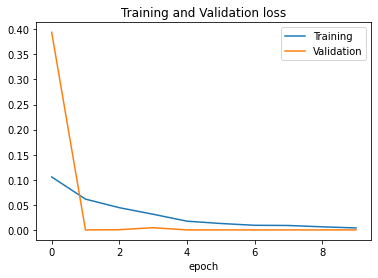

In [13]:
import matplotlib.pyplot as plt
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['Training','Validation'])
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation accuracy')

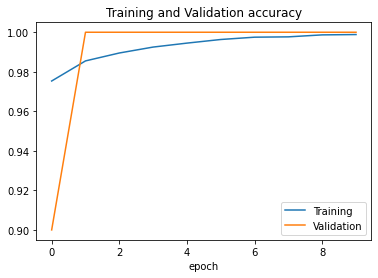

In [14]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.xlabel('epoch')
plt.legend(['Training','Validation'])
plt.title('Training and Validation accuracy')

In [15]:
test_loss,test_acc=model.evaluate(test_batches)
print('test_loss:{}  test_accuarcy{}'.format(test_loss,test_acc))

120/120 [==============================] - 9s 73ms/step - loss: 0.1736 - accuracy: 0.9800
test_loss:0.17355142533779144  test_accuarcy0.9800000190734863


In [26]:
print(test_batches[0])
pred=model.predict(test_batches[0])
print(pred[0])

 

[1.0000000e+00 3.0498043e-31]
